<a href="https://colab.research.google.com/github/vitorscience/Data-Science/blob/main/Detec%C3%A7%C3%A3o_de_Fraude_em_Cart%C3%B5es_de_Cr%C3%A9dito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 4.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*  

---

# Detecção de Fraudes em Cartões de Crédito

> Adicionar aspas



Neste projeto, iremos abordar o problema das fraudes em cartões de crédito, uma das principais preocupações das instituições financeiras como bancos e *fintechs*. Apenas no Brasil, cerca de 12,1 milhões de pessoas já foram vítimas de algum tipo de fraude financeira no último ano. Traduzindo em valores, os golpes financeiros ultrapassaram a cifra de R$ 1,8 bilhão de prejuízo por ano para os últimos 12 meses.

<p align=center>
<img src="https://images.unsplash.com/photo-1592772874383-d08932d29db7?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=699&q=80" width="60%"></p>

Dentra essas fraudes, aquelas envolvendo cartões de crédito são de grande relevância uma vez que a sua não-detecção acaretará em prejuízos consideráveis, tanto para o consumidor quanto para a instituição financeira.

Um outro fator a ser considerado é a quantidade de falsos positivos, ou seja, aquelas vezes em que você tentou fazer uma compra e teve seu cartão bloqueado preventivamente - o que provavelmente gerou estresse e constrangimento.

Por todos esses motivos, o investimento na área de detecção de fraudes por meio de Inteligência Artificial vem crescendo a cada ano, representando uma grande oportunidade em *Data Science*.

Dispondo de grandes volumes de dados como base histórica, um algoritmo de machine learning apenas um pouco melhor que os anteriores já representa uma economia de milhões de Reais. E esse é o desafio, aprimorar cada vez mais o uso de algoritmos visando inibir ou evitar transações fraudulentas.

## Importando os Dados

Os dados que usaremos neste projeto foram disponibilizados por algumas empresas européias de cartão de crédito. O *dataset* representa as operações financeiras que aconteceram no período de dois dias, onde foram classificadas 492 fraudes em meio a quase 290 mil transações.

Como você pode notar, este é um conjunto de dados extremamente desbalanceado, onde as fraudes representam apenas 0,17% do total.

Outro detalhe interessante é que as *features* são todas numéricas, e foram descaracterizadas (por problemas ligados à privacidade e segurança). Assim, os nomes das colunas são representados por $[V1, V2, V3 \dots, V28]$

<p align=center>
<img src="https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud" width="50%"></p>

[Na página original dos dados](https://www.kaggle.com/mlg-ulb/creditcardfraud), também é informado que as variáveis passaram por uma transformação conhecida como Análise de Componentes Principais (*Principal Component Analysis* - PCA).

A PCA permite a redução da dimensionalidade enquanto mantém o maior número possível de informações. Para conseguir isso, o algoritmo encontra um conjunto novo de recursos - os chamados **componentes**.

Esses componentes são em número menor or igual às variáveis originais. No caso deste projeto, os componentes achados pela transformação da PCA são as próprias colunas $[V1, V2, V3 \dots, V28]$.

In [21]:
# importar os pacotes necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


In [22]:
#Importanto os dados
file_path = "https://www.dropbox.com/s/b44o3t3ehmnx2b7/creditcard.csv?dl=1"

# importar os dados para um dataframe
df = pd.read_csv(file_path)

Com os dados importados para dentro de uma estrutura *Dataframe* - e não havendo a necessidade de mais nenhum ajuste ou configuração nesta etapa, pode-se iniciar uma análise exploratória dos dados a fim de preparar um modelo de *Machine Learning*.

Lembre-se de realizar o *split* dos conjuntos, para evitar o vazamento de dados.

Feito isso, vamos à Análise Exploratória.

## Análise Exploratória



In [23]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [24]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [25]:
df.shape

(284807, 31)

#Variáveis
As variáveis [v1, v2, v3...,v28] foram submetidas por um processo chamado PCA (Principal Component Analysis), uma técnica usada para reduzir dimensionalidades do conjunto de dados
a Variável time mostra o número  de segundos decorridos entre esta transação e a primeira transação no conjunto de dados


In [26]:
print(f'O número de colunas do dataframe é:{df.shape[1]} \nO número de linhas é:{df.shape[0]}')

O número de colunas do dataframe é:31 
O número de linhas é:284807


In [27]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [29]:
#Total de valores nulos
df.isnull().sum().sum()

0

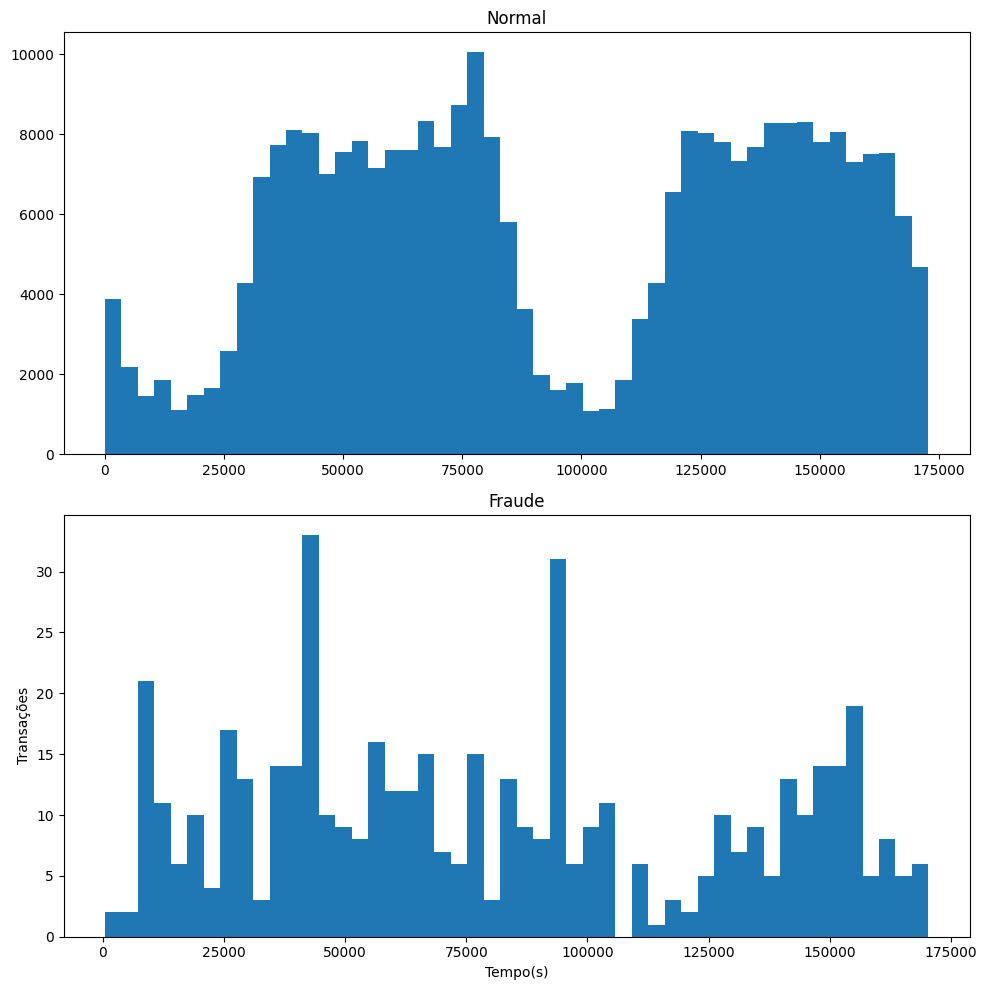

In [30]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,10))
ax1.hist(df.Time[df.Class==0], bins=50)
ax1.set_title('Normal')
ax2.hist(df.Time[df.Class==1], bins=50)
ax2.set_title('Fraude')

plt.xlabel('Tempo(s)')
plt.ylabel('Transações')
plt.tight_layout()

Verificando a distribuição dos dados dentro do DF

In [31]:
pd.value_counts(df['Class'])/df['Class'].shape[0]

Class
0    0.998273
1    0.001727
Name: count, dtype: float64

In [32]:
classe = pd.value_counts(df['Class'])


classe_df = pd.DataFrame(classe).reset_index()
classe_df.columns = ['Class', 'Count']

# Dicionário para renomear as classes
dic = {0: "normal", 1: "fraude"}
classe_df['Class'] = classe_df['Class'].map(dic)

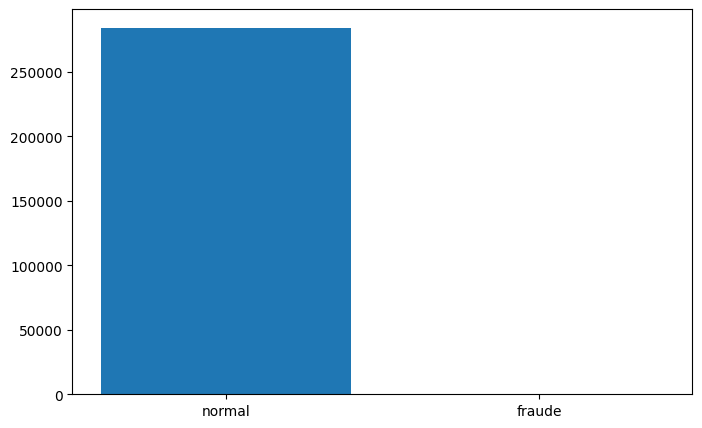

In [33]:
fig, ax = plt.subplots(figsize=(8,5))
ax.bar(classe_df.Class, classe_df.Count, )
plt.show()


Analisando o gráfico acima, é possível observar que o DataFrame está desbalanceado, pois as transações com fraude correspondem a apenas 0,17% do total.

<ipython-input-34-1602d43eea0a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Class", y="Amount", data=df, showmeans=True, palette=["#1f77b4", "#ff7f0e"])


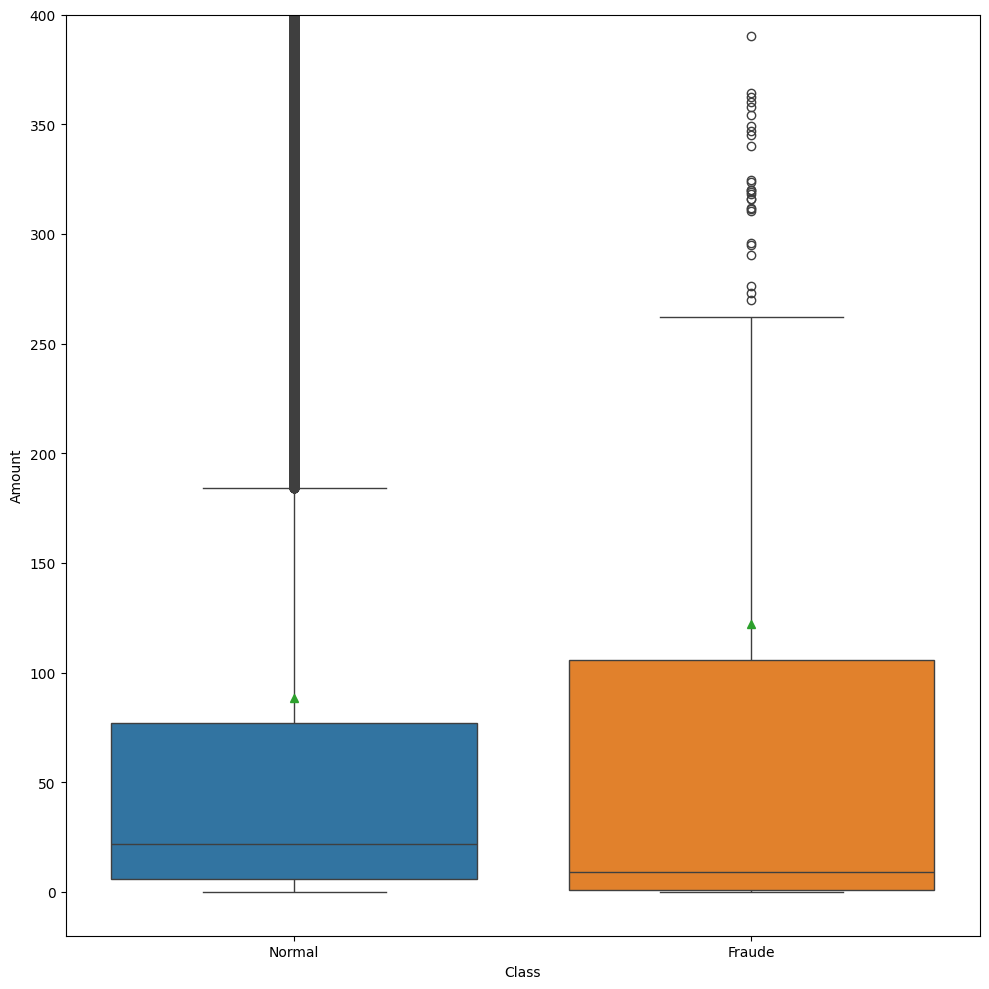

In [34]:
fig,ax = plt.subplots(figsize=(10,10),sharex=True)

sns.boxplot(x="Class", y="Amount", data=df, showmeans=True, palette=["#1f77b4", "#ff7f0e"])
plt.ylim((-20, 400))
plt.xticks([0, 1], ['Normal', 'Fraude'])

plt.tight_layout()

<ipython-input-35-73db6904cc75>:19: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_class_0[col], label="Class 0", shade=True, color='blue')
<ipython-input-35-73db6904cc75>:20: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_class_1[col], label="Class 1", shade=True, color='orange')
<ipython-input-35-73db6904cc75>:19: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_class_0[col], label="Class 0", shade=True, color='blue')
<ipython-input-35-73db6904cc75>:20: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kd

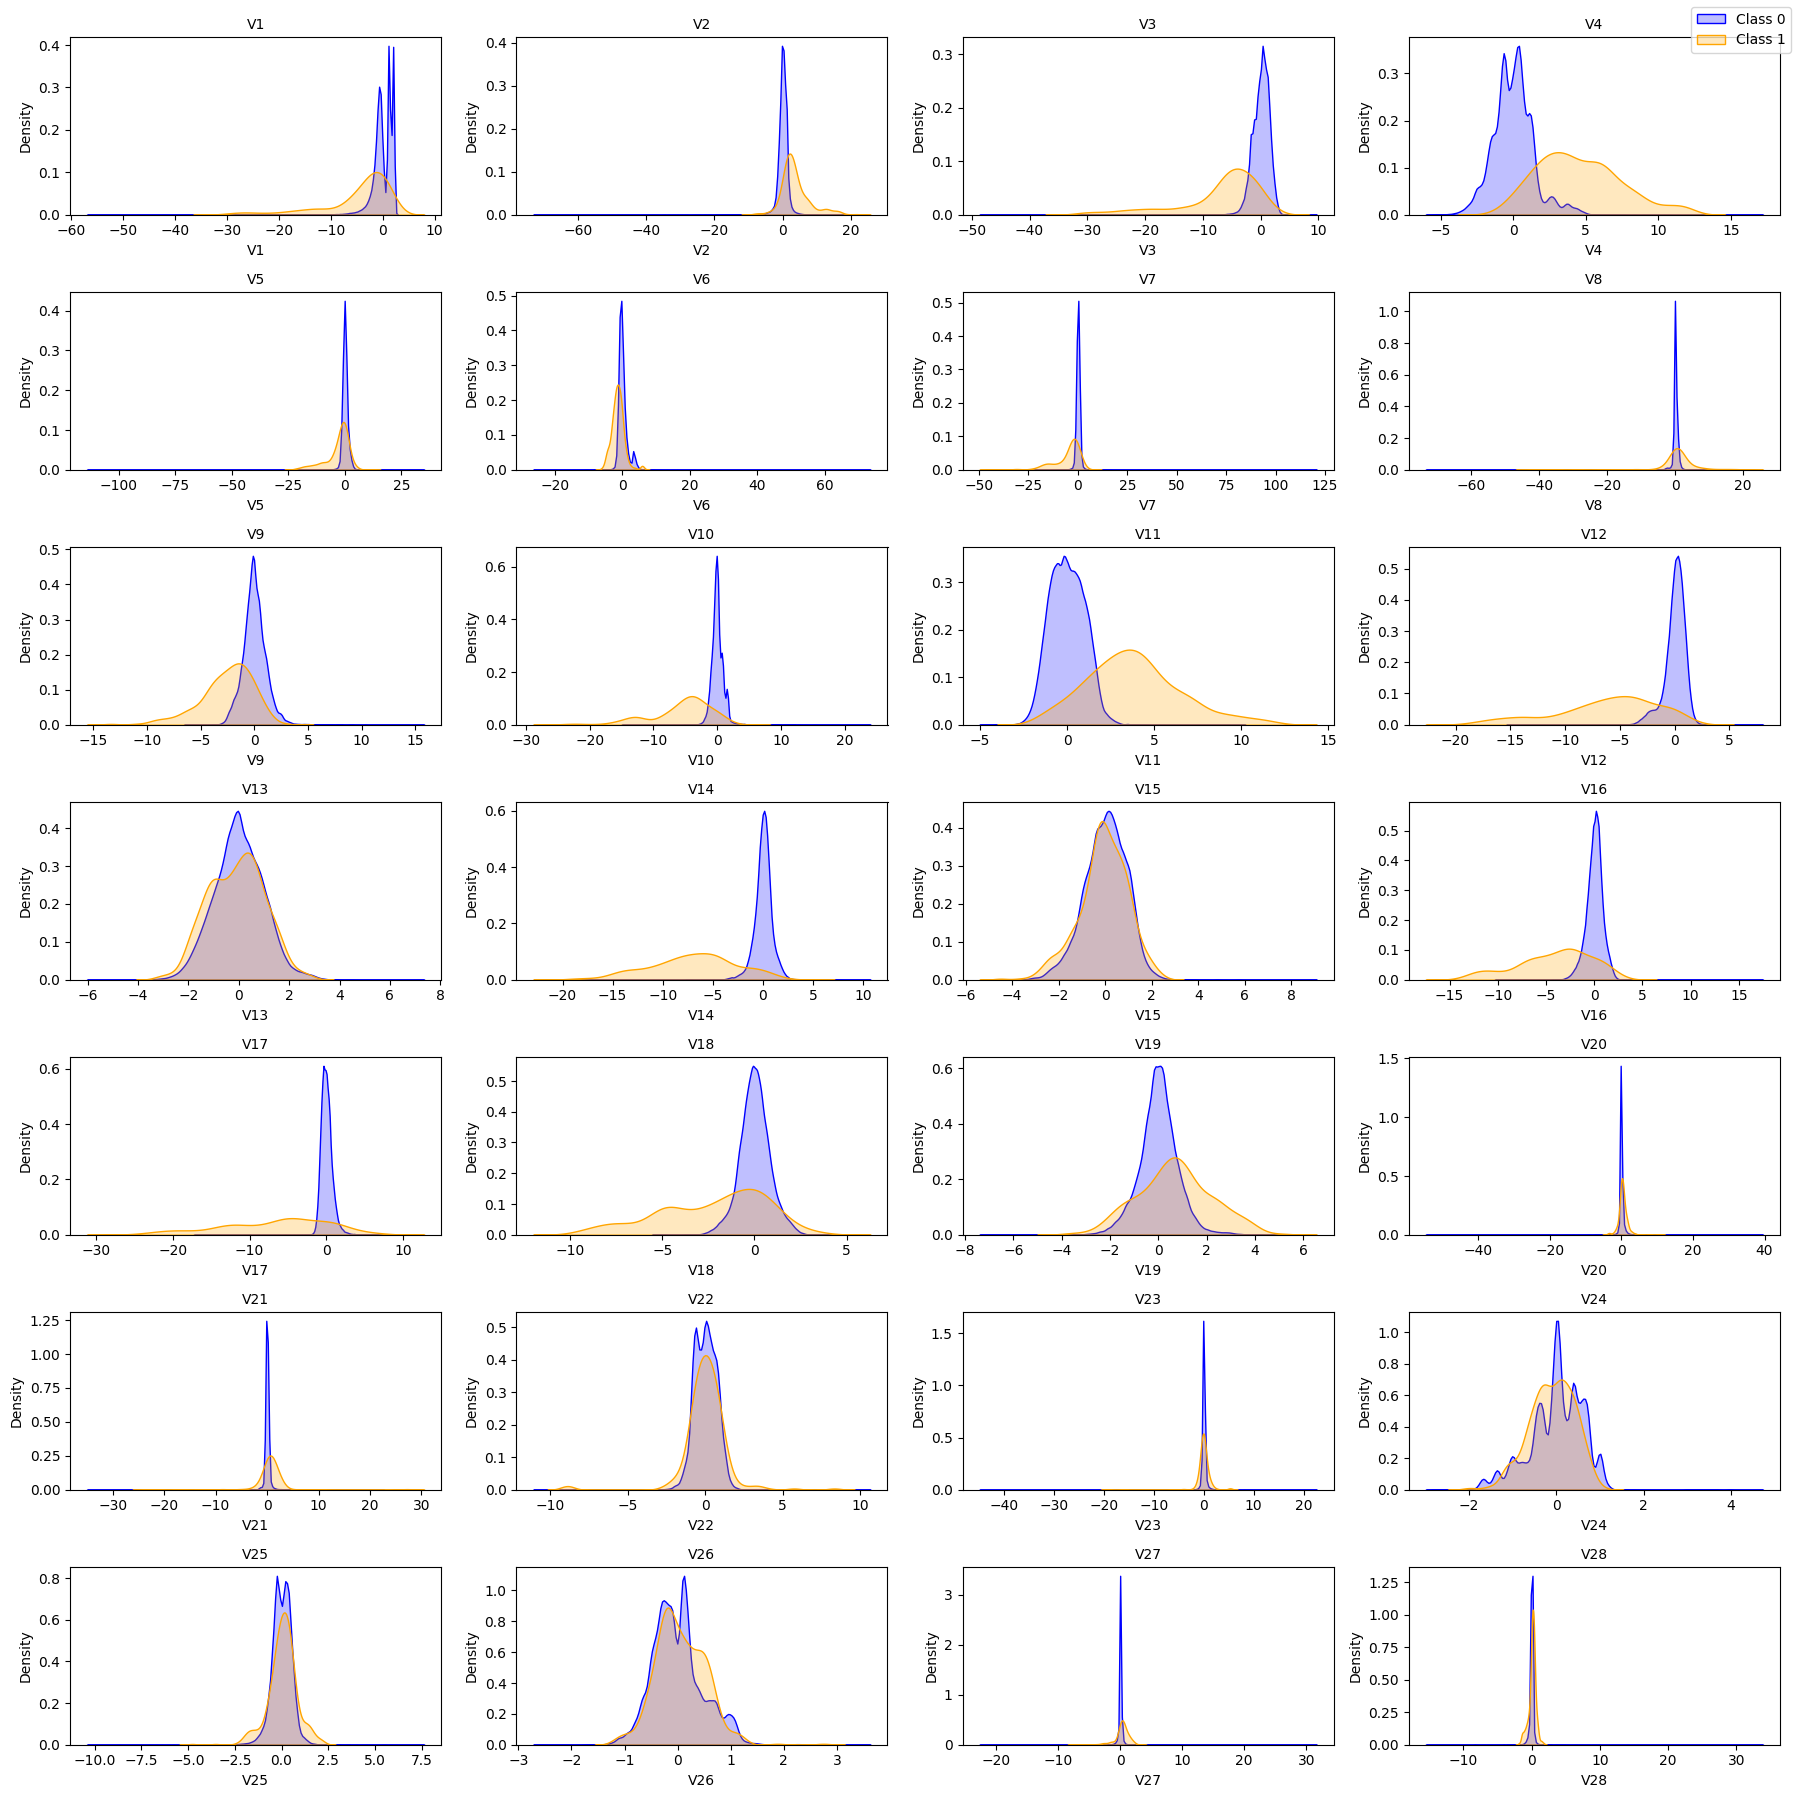

In [35]:
column_names = df.drop(['Class', 'Amount', 'Time'], axis=1).columns

num_plots = len(column_names)


df_class_0 = df[df.Class == 0]
df_class_1 = df[df.Class == 1]


fig, ax = plt.subplots(nrows=7, ncols=4, figsize=(18, 18))
fig.subplots_adjust(hspace=1, wspace=1)

idx = 0


for col in column_names:
    idx += 1
    plt.subplot(7, 4, idx)
    sns.kdeplot(df_class_0[col], label="Class 0", shade=True, color='blue')
    sns.kdeplot(df_class_1[col], label="Class 1", shade=True, color='orange')
    plt.title(col, fontsize=10)


plt.tight_layout()

# Adiciona a legenda na figura principal
handles, labels = ax[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')

plt.tight_layout();

## Preparação dos Dados

O processo de **normalizar** os dados complementa a preparação dos dados para algoritmos de aprendizado de máquina, garantindo que todas as características estejam na mesma escala e, para isso, será usado o StandardScaler.









O StandardScaler é uma ferramenta de pré-processamento de dados do pacote scikit-learn em Python, usada para padronizar as características dos dados. A padronização envolve ajustar os dados para que tenham média zero e desvio padrão igual a um, o que é importante para muitos algoritmos de aprendizado de máquina que assumem que os dados estão centrados em torno de zero com variância unitária.


In [36]:
df_clean = df.copy()

In [37]:
#Normalizando os dados
scaler = StandardScaler()
df_clean['std_amount'] = scaler.fit_transform(df_clean['Amount'].values.reshape(-1, 1))
df_clean['std_time'] = scaler.fit_transform(df_clean['Time'].values.reshape(-1, 1))

df_clean.drop(['Time', 'Amount'], axis=1, inplace=True)

# ver as primeiras entradas
df_clean.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,std_amount,std_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403,-1.996541


As variáveis time e aumount foram substituidas pelas variáveis std_amount e std_time

In [38]:
X = df_clean.drop('Class', axis=1)
y = df['Class']

Já que os dados estão desbalanceados, será usada uma técnica chamada Oversampling. Essa técnica permite aumentar a quantidade de amostras da classe minoritária, duplicando ou criando novas amostras a partir das existentes. O objetivo é equilibrar a distribuição das classes para melhorar o desempenho dos modelos de aprendizado de máquina.

In [39]:
smote = SMOTE(random_state=42)

X_res, y_res = smote.fit_resample(X, y)

In [40]:
y_res.value_counts()

Class
0    284315
1    284315
Name: count, dtype: int64

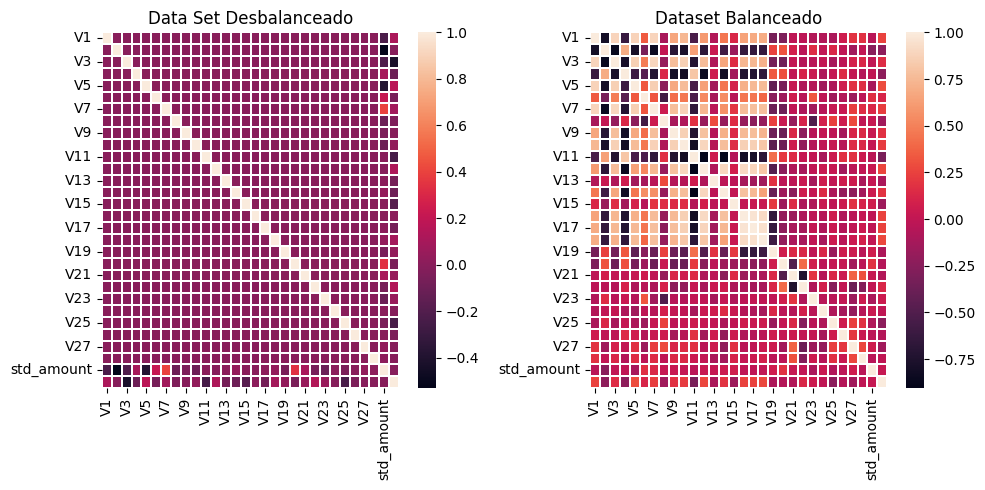

In [41]:
cor = X.corr()
cor_res = X_res.corr()
fig, ax = plt.subplots( nrows=1, ncols=2, figsize=(10,5),)
ax[0].set_title('Data Set Desbalanceado')
sns.heatmap(data=cor, ax=ax[0],linewidths=.1)
ax[1].set_title('Dataset Balanceado')
sns.heatmap(data=cor_res, ax=ax[1], linewidths=.1)

plt.tight_layout()

Com o gráfico de correlação, é possível observar que o dataset desbalanceado não traz informações relevantes sobre as variáveis, enquanto o dataset balanceado permite visualizar diferentes graus de correlação.



In [42]:
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res, test_size=0.3, random_state=42)

Uma etapa crucial do projeto é a separação das variáveis de dados em conjuntos de treino e teste. Esse método é chamado de divisão de dados (ou train-test split, em inglês). Essa prática é fundamental para avaliar a performance dos modelos de machine learning, garantindo que eles generalizem bem para novos dados. No conjunto de treino, o modelo aprende os padrões dos dados, enquanto no conjunto de teste, verificamos a sua capacidade de prever novos dados e evitamos o problema de overfitting, onde o modelo se ajusta excessivamente aos dados de treino e perde a capacidade de generalização.



## Modelo de Machine Learning

Nessa etapa, serão utilizados dois modelos de classificação distintos, ambos capazes de prever categorias. O primeiro modelo a ser utilizado será a Regressão Logística, enquanto o segundo será o Árvores de Decisão. Cada um desses modelos possui características únicas que contribuem para a eficácia da classificação em diferentes cenários.

A Regressão Logística é um método estatístico utilizado para modelar a probabilidade de um determinado evento ocorrer, sendo particularmente eficaz em problemas de classificação binária. Ela calcula a probabilidade de uma determinada entrada pertencer a uma categoria específica, baseando-se nas variáveis independentes fornecidas. Este modelo é amplamente utilizado devido à sua simplicidade e eficiência em diversos contextos.

Por outro lado, o modelo de Árvores de Decisão cria uma estrutura de decisão que mapeia as observações sobre um item para suas conclusões. Ele segmenta os dados em subconjuntos baseados em valores de características, construindo uma árvore onde cada nó representa uma decisão baseada em uma característica específica. Este modelo é conhecido por sua interpretabilidade e capacidade de lidar com dados não-lineares e interações complexas entre variáveis.

In [45]:
#Regressão Logística
model_logistic = LogisticRegression()
model_logistic.fit(X_train, y_train )


LogisticRegression()

In [46]:
model_tree = DecisionTreeClassifier()
model_tree.fit(X_train, y_train)


DecisionTreeClassifier()

In [47]:
y_logistic = model_logistic.predict(X_test)

In [48]:
y_tree = model_tree.predict(X_test)

## Avaliar o desempenho do modelo

* Identificar a melhor métrica para esse tipo de modelo
* [*Opcional*] Comparar o desempenho entre diversos modelos

In [49]:
accuracy_logistic=accuracy_score(y_test, y_logistic)

In [50]:
precision_logistic=precision_score(y_test, y_logistic)

In [51]:
recall_logistic=recall_score(y_test, y_logistic)

In [52]:
confucion_logistic=confusion_matrix(y_test, y_logistic)

In [53]:
confucion_logistic

array([[83057,  2092],
       [ 6671, 78769]])

In [54]:
print(f'Accuracy: {accuracy_logistic} \nprecision: {precision_logistic} \nrecall: {recall_logistic}')

Accuracy: 0.948630919930359 
precision: 0.9741284426361286 
recall: 0.9219218164794007


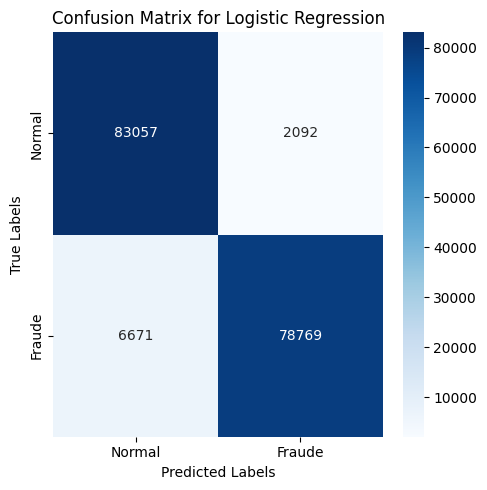

In [55]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(confucion_logistic, annot=True, fmt='d', cmap='Blues', ax=ax)

ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix for Logistic Regression')
ax.set_xticklabels(['Normal', 'Fraude'])
ax.set_yticklabels(['Normal', 'Fraude'])
plt.tight_layout()
plt.show()

Modelo de Arvore de Decisão

In [56]:
accuracy_tree=accuracy_score(y_test, y_tree)

In [57]:
recall_tree=recall_score(y_test, y_tree)

In [58]:
precision_tree=precision_score(y_test, y_tree)

In [59]:
confusion_tree=confusion_matrix(y_test, y_tree)


In [60]:
print(f'Accuracy: {accuracy_tree} \nprecision: {precision_tree} \nrecall: {recall_tree}')

Accuracy: 0.9981241463400337 
precision: 0.9972427329656978 
recall: 0.9990168539325842


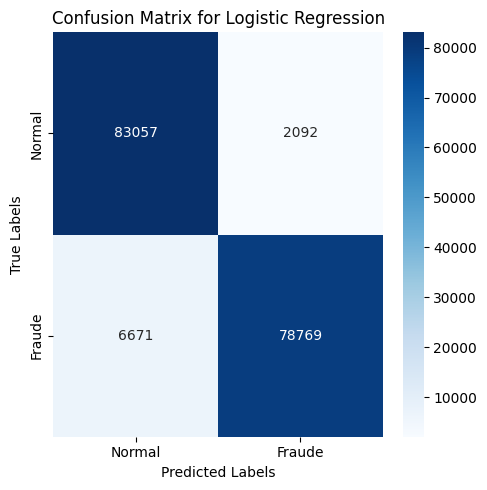

In [61]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(confucion_logistic, annot=True, fmt='d', cmap='Blues', ax=ax)

ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix for Logistic Regression')
ax.set_xticklabels(['Normal', 'Fraude'])
ax.set_yticklabels(['Normal', 'Fraude'])
plt.tight_layout()
plt.show()


É possível observar que o modelo de árvore de decisão apresentou um desempenho superior em relação à regressão logística. A métrica de recall da árvore de decisão permite avaliar a capacidade do modelo em identificar corretamente as ocorrências positivas. Neste caso, o recall da árvore de decisão foi de 0,9990, enquanto o recall da regressão logística foi de 0,9219. Isso indica que a árvore de decisão teve uma maior eficácia em identificar as ocorrências positivas em comparação com a regressão logística. O recall é uma excelente forma de monitorar a taxa de verdadeiros positivos.

#Conclusão

Em conclusão, mesmo após a aplicação da técnica de Análise de Componentes Principais (PCA) no conjunto de dados inicial, foi possível realizar o balanceamento dos dados de forma eficaz. Além disso, os dados extraídos estavam completos, sem ausência de informações, o que contribui para a robustez e a qualidade das analises e modelagem.